<a href="https://colab.research.google.com/github/TABEYWICKRAMA/Python_series_end-to-end/blob/main/Lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/MyDrive/Cat&Dog Dataset/


/content/drive/MyDrive/Cat&Dog Dataset


1. Acquire Data

In [5]:
train_path = 'Training_data'
valid_path = 'Testing_data' 

2. Define the model

In [6]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    #This is the first convolution
    tf.keras.layers.Conv2D(filters=16,kernel_size=3, activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    #The second convolution
    tf.keras.layers.Conv2D(filters=16,kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    #The Third convolution
    tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),


    #The Fourth convolution
    tf.keras.layers.Conv2D(filters=64,kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    #The Fifth convolution
    tf.keras.layers.Conv2D(filters=64,kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    #Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),

    #512 neuron hidden layer
    tf.keras.layers.Dense(512, activation= 'relu'),

    #only 1 output neuron, it will contain a value from 0-1 where 0 for 1 class('Cat') and 1 for the other ('Dog')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 32)       0

3. Compile the model

In [8]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss ='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


4. Train the model from generators

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#All train image will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale = 1./255)

#Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_path, # this is the source directory
                                                    target_size = (300,300), 
                                                    batch_size = 32, 
                                                    class_mode='binary')

# All test images will rescaled by 1./255
test_datagen = ImageDataGenerator(rescale=1./255)
# apply predefined specification to test dataset
test_set = test_datagen.flow_from_directory(valid_path, target_size = (300,300), batch_size=32, class_mode='binary')

Found 633 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


*5*. Training


In [10]:
history = model.fit(
    train_generator,
    validation_data=test_set,
    steps_per_epoch=8,
    epochs=2
)

Epoch 1/2
8/8 [==============================] - 62s 8s/step - loss: 1.0732 - accuracy: 0.6104 - val_loss: 0.7065 - val_accuracy: 0.5000
Epoch 2/2
8/8 [==============================] - 25s 3s/step - loss: 0.6816 - accuracy: 0.5703 - val_loss: 0.7029 - val_accuracy: 0.5000


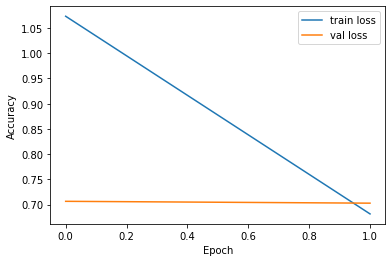

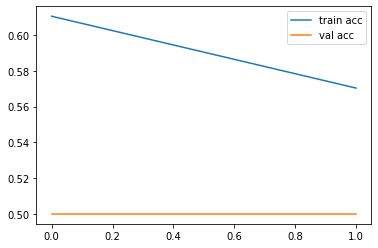

<Figure size 432x288 with 0 Axes>

In [11]:
#save weights for future predictions
model.save_weights('first_try.h5')

#plot variation in loss and accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#plot the accuracy\n
plt.plot(history.history['accuracy'],label='train acc')
plt.plot(history.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')